# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [468]:
#Write your code here, You may need to use python open() function to open the file and load data.

import pandas as pd
import json
import matplotlib.pyplot as plt

artist_file = open('/content/yearinfo.json')
year = json.load(artist_file)
print(year)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [469]:
# As the key here is the year, check how many years of data is included 
year.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [470]:
#columns
year['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [471]:
length = [len(year['2010']), len(year['2011']), len(year['2012']), len(year['2013'])]
length

[100, 100, 100, 100]

In [472]:
#adding the year column
col = list(year['2010'][0].keys())+(['year'])
col

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [473]:
#write your code here
#creating dataframe and print the first five rows
list1 = []
for key, value in year.items():
    for i in value:
        list2 = list(i.values())+[key]
        list1.append(list2)

df = pd.DataFrame(list1,columns=col)
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [474]:
# Checking null values
df.isnull().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [475]:
# view the datatype of each col
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [476]:
# Changing dtype for the year col
df.year = df.year.astype('int')

In [477]:
# view the datatype of each col
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [478]:
# Using function to the formated value in the dataset
def fun(list_name):
    data = list_name[0]
    return data

In [479]:
# Changing the data of the following columns into proper formated one
df['band_singer'] = df.band_singer.map(fun)
df['song'] = df.song.map(fun)
df['songurl'] = df.songurl.map(fun)
df['url'] = df.url.map(fun)

In [480]:
# printing the first 5 rows and noticing the changes
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [481]:
# all the singers
singers = df.band_singer[:]
singers

0                  Kesha
1        Lady Antebellum
2           Train (band)
3             Katy Perry
4       Usher (musician)
              ...       
1195       Lainey Wilson
1196            BRS Kash
1197            Rod Wave
1198          Chase Rice
1199      Rauw Alejandro
Name: band_singer, Length: 1200, dtype: object

In [482]:
# Series containing counts of unique values in band_singer column
df1 = df['band_singer'].value_counts() 
df1

Drake (musician)       26
Maroon 5               21
Rihanna                21
Ariana Grande          20
Taylor Swift           19
                       ..
Swedish House Mafia     1
Luis Fonsi              1
Kris Allen              1
James Arthur            1
Rauw Alejandro          1
Name: band_singer, Length: 436, dtype: int64

In [483]:
# singers who have appeared more than 15 times on the billboard chart
df.value_counts(subset=['band_singer']).loc[lambda x:x > 15]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

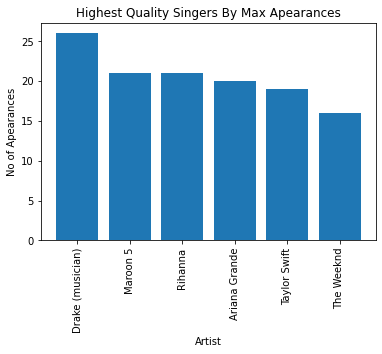

In [484]:
#Write your program and plot bar graph
y = df.band_singer.value_counts().loc[lambda x:x > 15]
x = y.index
plt.bar(x,y)
plt.title("Highest Quality Singers By Max Apearances")
plt.xlabel('Artist')
plt.ylabel('No of Apearances')
plt.xticks(rotation=90)
plt.show()


**Question: Who is the most profilic singer?**



Answer: Drake seems to be the most profilic singer as the singer has appeared the maximum number(26) of times on the top 100 billboard char

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [485]:
#write your code here
# Adding a new column called 'Score'
# The score column will contain the rank of each year's top 100 artist
df['Score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  Score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [486]:
# Adding the singers' total scores 

tol_score = {}
for singer, songs in df.groupby('band_singer'):
    tol_score[singer] = songs.Score.sum()
tol_score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


In [487]:
# Graph for the different metric
y = pd.Series(data=tol_score, index=y.keys())[:20].sort_values(ascending=False)
x = y.index
plt.bar(x,y)
plt.title("Highest Quality Singers By Total Scores")
plt.xlabel('Artist')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Answer: Yes, it seems there a major differences/change when we change the metric. It is seen that the singers in the 4th and 5th positions have chnages in their rankings. I believe that this changes is caused due to using the total score of each singer instead of the number of appearances in the top 100 billboard char 

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

QUESTION: Highest ranked singers each year and top 20 highest ranked singers in a particular year(2010)?

In [488]:
# Group by year
df1 = df.groupby('year')
len(df1)

12

In [489]:
# Each year's highest ranked singer

for key, data in df1:
    df2 = data[data.ranking == data.ranking.max()]
    print(df2.year, df2.band_singer, df2.song)

99    2010
Name: year, dtype: int64 99    Jerrod Niemann
Name: band_singer, dtype: object 99    /wiki/Lover,_Lover
Name: song, dtype: object
199    2011
Name: year, dtype: int64 199    Big Sean
Name: band_singer, dtype: object 199    /wiki/My_Last
Name: song, dtype: object
299    2012
Name: year, dtype: int64 299    Linkin Park
Name: band_singer, dtype: object 299    /wiki/Burn_It_Down_(Linkin_Park_song)
Name: song, dtype: object
399    2013
Name: year, dtype: int64 399    Paramore
Name: band_singer, dtype: object 399    /wiki/Still_Into_You
Name: song, dtype: object
499    2014
Name: year, dtype: int64 499    Miley Cyrus
Name: band_singer, dtype: object 499    /wiki/Adore_You_(Miley_Cyrus_song)
Name: song, dtype: object
599    2015
Name: year, dtype: int64 599    Calvin Harris
Name: band_singer, dtype: object 599    /wiki/How_Deep_Is_Your_Love_(Calvin_Harris_and...
Name: song, dtype: object
699    2016
Name: year, dtype: int64 699    One Direction
Name: band_singer, dtype: object 699 

Answer: The highest ranked singers in each year is listed above

In [490]:
# finding the highest ranked artist in 2010

yr = df.groupby('year')
yr_2010 = yr.get_group(2010)
highest_ranked = yr_2010['band_singer'].value_counts(sort = True)[:20]
yearof2010 = pd.DataFrame(highest_ranked)
yearof2010

band_singer
Kesha                          4
The Black Eyed Peas            4
Usher (musician)               4
Lady Gaga                      4
B.o.B                          3
Drake (rapper)                 3
Jason Derulo                   3
Rihanna                        3
Taylor Swift                   3
Ludacris                       2
Jay Sean                       2
Trey Songz                     2
Alicia Keys                    2
Lady Antebellum                2
Jay-Z                          2
OneRepublic                    2
Taio Cruz                      2
Eminem                         2
Katy Perry                     2
Timbaland                      2

Text(0, 0.5, 'Rank')

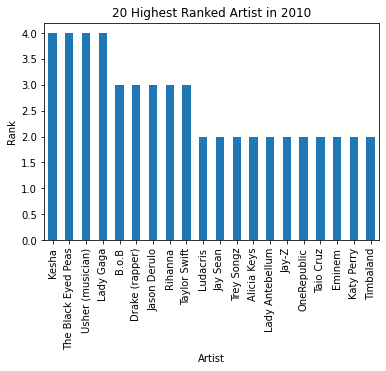

In [491]:
# Visualization through a bar chart
yearof2010['band_singer'].plot(kind = "bar")
plt.title("20 Highest Ranked Artist in 2010")
plt.xlabel('Artist')
plt.ylabel('Rank')

Answer: The top 20 highest ranked singers in year 2010 is listed above

## SUBMISSION DATE: 2nd April 2022 